In [1]:
# !pip install rake_nltk
# !pip install neattext
# nltk.download('stopwords') 
# Add courses that haven't been interacted with? using input()? 

In [51]:
import pandas as pd
import numpy as np
#text cleaning to remove stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')
from rake_nltk import Rake
import neattext.functions as nfx
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2>DATA COLLECTION</h2>

In [2]:
df_course = pd.read_csv(r'C:\Users\abdul\udemy course.csv',sep=';')
df_review = pd.read_csv(r'C:\Users\abdul\udemy review.csv',sep=';')


In [3]:
df_course.head()

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby
1,8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,10/07/2017 00:00,20/06/2011 17:48,20/06/2011 19:59,350000,182000.0,All Levels,HTML
2,8319,Git Basics: In Theory and Practice,291,12,31,7.5,NaN,29/07/2011 20:24,28/06/2011 04:48,280000,182000.0,All Levels,Git
3,8324,Javascript for Beginners,3840,258,48,3.0,16/07/2019 00:00,09/07/2011 05:43,28/06/2011 08:26,280000,182000.0,All Levels,JavaScript
4,8325,HTML Tutorial: HTML & CSS for Beginners,12521,297,82,4.0,16/07/2019 00:00,09/09/2011 15:28,28/06/2011 08:27,280000,182000.0,All Levels,HTML


In [4]:
df_review.head()

,course_id,rating,review_content,date
0,8082,4.5,Delivers more than expected. Thank you!,29/07/2019 11:19
1,8082,2.5,This course would be a good choice if 1) you a...,22/06/2019 11:25
2,8082,5.0,I am new to Ruby but have programmed in Python...,14/01/2019 12:40
3,8082,4.0,The instructor has provided quite a lot of inf...,04/12/2018 08:03
4,8082,5.0,"Hare Kṛṣṇa, Hare Kṛṣṇa, Kṛṣṇa Kṛṣṇa, Hare Hare...",16/11/2018 19:12


<h2>DATA CLEANING</h2>

1. Names are descriptive enough
2. No duplicates in course dataset, 1 duplicate in review dataset
3. Convert all date columns from object to datetime
4. create publish year from published date

In [5]:
#check datatypes
df_course.dtypes

course_id           int64
course_name        object
subs                int64
num_reviews         int64
num_lectures        int64
duration          float64
last_update        object
publish_date       object
created_date       object
original_price      int64
discount_price    float64
level              object
label              object
dtype: object

In [6]:
df_review.dtypes

course_id           int64
rating            float64
review_content     object
date               object
dtype: object

convert all dates column datatype from object to datetime, and course_id to object

In [7]:
df_course.head(1)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,21/08/2019 00:00,08/07/2011 21:32,14/06/2011 16:09,1050000,182000.0,All Levels,Ruby


In [8]:
#convert date column to datetime
df_course['last_update'] = pd.to_datetime(df_course['last_update'])
df_course['publish_date'] = pd.to_datetime(df_course['publish_date'])
df_course['created_date'] = pd.to_datetime(df_course['created_date'])
df_review['date'] = pd.to_datetime(df_review['date'])


In [9]:
#convert course id from int to object. 
df_course['course_id'] = df_course['course_id'].apply(str)
df_review['course_id'] = df_review['course_id'].apply(str)

In [10]:
df_course.duplicated().sum()

0

In [11]:
# 1 duplicate
df_review.duplicated().sum()

1

In [12]:
#drop the duplicates
df_review.drop_duplicates(inplace=True)

In [13]:
df_course.shape

(9243, 13)

In [14]:
df_review.shape

(488757, 4)

In [72]:
df_course.sample(6)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
2584,885581,HTML5 CSS3 Javascript: All in one course [WEEK...,154,34,83,7.0,2018-11-13,2016-10-21 14:29:00,2016-06-22 18:56:00,1400000,182000.0,All Levels,PHP
5028,1398334,Build a Flappy Bird like game in Clickteam Fus...,59,10,28,1.5,2017-11-14,2017-10-19 03:12:00,2017-10-17 18:20:00,420000,NaN,All Levels,Clickteam
4404,1295786,R and Machine Learning Fundamentals,19,3,23,1.5,2017-07-20,2017-07-20 23:13:00,2017-07-17 11:38:00,2800000,182000.0,Intermediate,Machine Learning
8994,2411470,Travis CI Tutorial,1897,10,33,2.0,2019-09-13,2019-01-07 00:43:00,2019-06-13 07:41:00,280000,182000.0,All Levels,Continuous Integration
6199,1630748,Javascript and PHP Programming Bundle,3112,42,80,8.0,2019-09-07,2018-05-04 18:20:00,2018-04-04 12:54:00,2800000,182000.0,Beginner,JavaScript
7388,1931104,Hands-on Scikit-learn for Machine Learning,49,6,50,9.0,2018-10-10,2018-11-10 19:33:00,2018-09-25 03:54:00,1750000,182000.0,Intermediate,Machine Learning


There are non english stuff. We'll revisit 

In [73]:
df_review.sample(6)

,course_id,rating,review_content,date
369517,1338454,5.0,"nice course,",2018-03-05 13:39:00
214295,876850,3.5,"I enjoyed the course thoroughly, But expected ...",2017-08-01 03:42:00
250299,959700,4.0,I like how Stephen reiterates basics as well a...,2019-01-16 09:41:00
317515,1192352,4.0,Very concise and very well explained. Everyone...,2019-09-08 09:47:00
266368,1002676,3.0,Course moves to fast,2017-05-23 15:32:00
239996,939452,5.0,Quite a clear explanation of general definitio...,2018-04-25 12:36:00


In [74]:
df_course.head(2)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,2019-08-21,2011-08-07 21:32:00,2011-06-14 16:09:00,1050000,182000.0,All Levels,Ruby
1,8203,Basic and Advanced HTML Lessons,1550,12,15,1.0,2017-10-07,2011-06-20 17:48:00,2011-06-20 19:59:00,350000,182000.0,All Levels,HTML


In [15]:
#columns : last_update, discount_price, level, and label have null values. Others are known
df_course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9243 entries, 0 to 9242
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   course_id       9243 non-null   object        
 1   course_name     9243 non-null   object        
 2   subs            9243 non-null   int64         
 3   num_reviews     9243 non-null   int64         
 4   num_lectures    9243 non-null   int64         
 5   duration        9243 non-null   float64       
 6   last_update     9218 non-null   datetime64[ns]
 7   publish_date    9243 non-null   datetime64[ns]
 8   created_date    9243 non-null   datetime64[ns]
 9   original_price  9243 non-null   int64         
 10  discount_price  9063 non-null   float64       
 11  level           9239 non-null   object        
 12  label           9233 non-null   object        
dtypes: datetime64[ns](3), float64(2), int64(4), object(4)
memory usage: 938.9+ KB


In [16]:
#There are rows with no course id 
 
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 488757 entries, 0 to 488757
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   course_id       488757 non-null  object        
 1   rating          488757 non-null  float64       
 2   review_content  488677 non-null  object        
 3   date            488757 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 18.6+ MB


<h2>DATA ANALYSIS</h2>

1. Courses with the highest number of reviews
2. Do higher ratings correlate with: course duration, number of lectures, original_price, discount_price, level?
3. Correlation between frequently updated courses and average ratings
4. words associated with good reviews

 wHAT TYPE OF RECOMMENDER SYSTEM DO WE USE?

Most popular courses reviewed

In [17]:
df_courseCopy = df_course.copy()
df_courseCopy.sort_values(by='subs',ascending = False,inplace=True )
df_courseCopy.reset_index(inplace=True,drop =True)
df_courseCopy.head()

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,567828,Complete Python Bootcamp: Go from zero to hero...,685057,186085,186,24.0,2019-04-09,2015-12-10 21:42:00,2015-07-29 00:12:00,2730000,182000.0,All Levels,Python
1,625204,The Web Developer Bootcamp,460682,135796,399,47.0,2019-05-09,2015-02-11 21:13:00,2015-09-28 21:32:00,2800000,182000.0,All Levels,Web Development
2,533682,Java Programming Masterclass for Software Deve...,357090,83454,392,79.0,2019-08-22,2015-07-21 22:01:00,2015-06-21 20:25:00,2100000,182000.0,All Levels,Java
3,41295,Learn HTML5 Programming From Scratch,316033,13294,46,10.5,2018-11-26,2013-02-14 07:03:00,2013-12-02 09:25:00,280000,182000.0,All Levels,HTML5
4,258316,Complete C# Unity Developer 2D: Learn to Code ...,315197,63783,221,35.0,2019-09-14,2014-03-09 19:30:00,2014-09-07 19:17:00,2730000,182000.0,All Levels,Unity


Most popular 'label' according to number of subscribers

In [21]:
# df_courseCopy = df_course.copy()
# df_labelCat = df_courseCopy.groupby(['label'],as_index=False)['subs'].sum()
# # df_labelCat.to_frame()
# df_labelCat.reset_index(level=0, drop=True,inplACE=True)
# # df_labelCat = df_labelCat.to_frame()
# # df_labelCat.sort_values(by='subs', ascending = False, inplace=True)
# # df_labelCat.reset_index(inplace=True)
# # # df_courseCopy.sort_values(by='num_reviews',ascending = False,inplace=True )
# # # df_courseCopy.reset_index(inplace=True,drop =True)
# # # df_courseCopy.head()
# type(df_labelCat)

<AxesSubplot:title={'center':'Labels with the most courses'}, xlabel='Label', ylabel='Number of courses'>

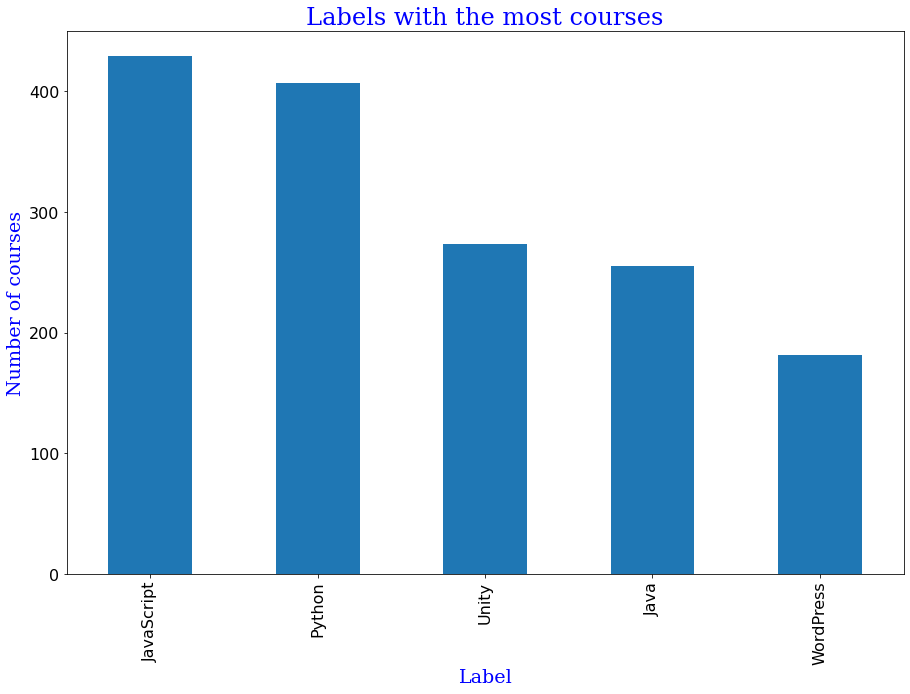

In [37]:
# df_course['label'].value_counts()
# dfTopSubs = df_course.groupby(['label'])['subs'].count()
# dfTopSubs.sort_values(ascending = False, inplace=True)
# dfTopSubs.reset_index(inplace=True)
fig, ax = plt.subplots()
font = {'family':'serif','color':'blue','size':19}
font2 = {'family':'serif','color':'blue','size':24}
plt.title('Labels with the most courses',fontdict = font2)
plt.xlabel('Label',fontdict=font)
plt.ylabel('Number of courses',fontdict=font)
ax.tick_params(axis='both', which='major', labelsize=16)
dfTopSubs.head().plot(kind='bar',xlabel = "Label",ylabel='Number of courses',figsize = (15,10),
                     )

we use label instead of  'category' because users are quite specific on the topic they'd like to learn


In [ ]:
#check which if number of reviews actually tallies with dataset. 

### 2. Impact of course duration
How does the course duration relate to the number of subscribers or reviews? Are longer courses more popular or successful?

In [38]:
df_course.head(1)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,2019-08-21,2011-08-07 21:32:00,2011-06-14 16:09:00,1050000,182000.0,All Levels,Ruby


Sentiment score there 

In [40]:
# Calculate the correlation between course duration and the number of subscribers
subscribers_corr = df_course['duration'].corr(df_course['subs'])

In [46]:
print(f"Correlation between course duration and subscribers: {subscribers_corr:.2f}")

Correlation between course duration and subscribers: 0.17


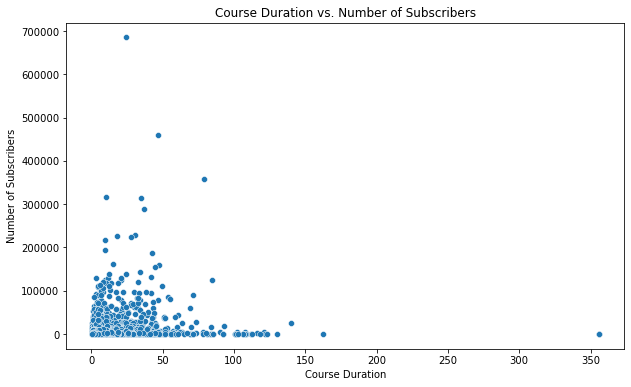

In [42]:
# scatter plot to visualize the relationship between course duration and subscribers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='subs', data=df_course)
plt.title('Course Duration vs. Number of Subscribers')
plt.xlabel('Course Duration')
plt.ylabel('Number of Subscribers')
plt.show()



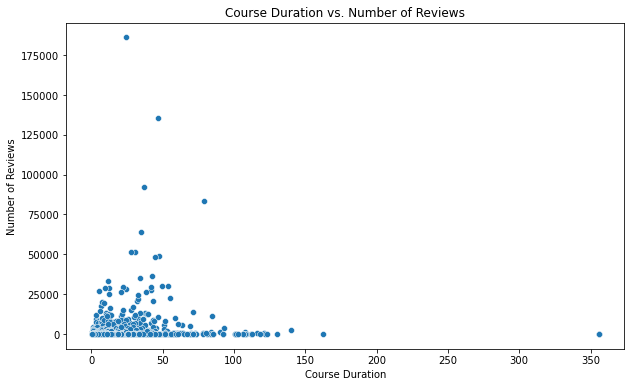

In [43]:
#scatter plot to visualize the relationship between course duration and reviews
plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration', y='num_reviews', data=df_course)
plt.title('Course Duration vs. Number of Reviews')
plt.xlabel('Course Duration')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
df_course['publish_date']

<h2>RECOMMENDATION SYSTEM</h2>
How to build a recommendation system via title and review sentiment using similarity. 

In [47]:
# dir(nfx)

In [49]:
df_course.head(1)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,2019-08-21,2011-08-07 21:32:00,2011-06-14 16:09:00,1050000,182000.0,All Levels,Ruby


In [52]:
# Function to remove stopwords from a text
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to create a new cleaned_title column
df_course = df_course.copy()
df_course['cleaned_title'] = df_course['course_name'].apply(remove_stopwords)
df_course['cleaned_title'].iloc[1:5]

1            Basic Advanced HTML Lessons
2            Git Basics: Theory Practice
3                   Javascript Beginners
4    HTML Tutorial: HTML & CSS Beginners
Name: cleaned_title, dtype: object

In [56]:
# #remove all stopwords

# df_course['cleaned_title'] = df_course['course_name'].apply(nfx.remove_stopwords)

# # df_course['cleaned_title'] = df_course['cleaned_title'].apply(nfx.remove_special_characters)

# df_course['cleaned_title'].iloc[1:5]

In [53]:
df_course['cleaned_title'].iloc[1:10]

1                          Basic Advanced HTML Lessons
2                          Git Basics: Theory Practice
3                                 Javascript Beginners
4                  HTML Tutorial: HTML & CSS Beginners
5    Beginners - Create iPhone iPad Apps - Zero Coding
6    Programming Java Beginners - Ultimate Java Tut...
7                                    Learn Program C++
8    Practical Transformation Using XSLT XPath (5-h...
9          Introduction Microsoft SQL Server Databases
Name: cleaned_title, dtype: object

In [58]:
#compare course name before and after removing stopwords - specify words like "git","c++" to not remove
tempDF =  df_course[['cleaned_title','course_name']]
tempDF.sample(10)

,cleaned_title,course_name
1175,Bug Tracking Jira: Jira Software/QA Testers,Bug Tracking with Jira: Jira for Software/QA T...
4349,Learning Path: Frontend Web Development Bootst...,Learning Path: Frontend Web Development with B...
5480,LEARNING PATH: Game Development GameMaker Stud...,LEARNING PATH: Game Development with GameMaker...
6995,C++ Programming Basics,C++ Programming Basics
2051,iOS App Development Complete & Utter Coding Be...,iOS App Development For Complete & Utter Codin...
9081,"Create Members Blog using PHP, MySQL, & AJAX","Create a Members Only Blog using PHP, MySQL, &..."
8133,Selenium Webdriver Cucumber BDD Automation Fra...,Selenium Webdriver with Cucumber BDD Automatio...
9038,Complete Datatable Tutorial CodeIgniter Framework,Complete Datatable Tutorial with CodeIgniter F...
1611,eCommerce: Create eCommerce Site Without Coding,eCommerce: Create Your Own eCommerce Site With...
5147,LEARNING PATH: ElasticSearch: ElasticSearch 5....,LEARNING PATH: ElasticSearch: ElasticSearch 5....


In [60]:
# finding the maximum length of the clean title
# tempDF[tempDF['cleaned_title'].str.len()==max(tempDF['cleaned_title'].absstr.len())]

texts = df_course['cleaned_title']

In [63]:
def special_char_check(text: str) -> bool:
    # Check if any character in the text is not alphanumeric and not a space
    return any(not c.isalnum() and not c.isspace() for c in text)
special_text_list = []   
if __name__ == '__main__':
 
    for text in texts:
        if special_char_check(text):
            special_text_list.append(text)


In [65]:
#we have 5515 courses with special names. 
len(special_text_list)

5515

In [ ]:
alltokens = [token for line in every_title for token in line.split()]

print(len(alltokens))

print(alltokens[1:4])

In [71]:
'''
The code below checks for the most popular tokens in our courses name 
'''
#Append all titles with stopwords removed into a list
every_title  = df_course['cleaned_title'].to_list()

# Initialize an empty list to store all tokens
alltokens = []

# Tokenize each line and add tokens to the alltokens list
for line in every_title:
    tokens = line.split()  # Split the line into tokens
    alltokens.extend(tokens)  # Add tokens to the alltokens list

#check the top used words - things like with, from, 'With', 'From'- removed. 
from collections import Counter

freq_words = dict(Counter(alltokens).most_common(20))

freq_words

{'-': 1421,
 'Learn': 1129,
 '&': 867,
 'Complete': 714,
 'Development': 688,
 'Build': 664,
 'Python': 657,
 'Programming': 638,
 'Beginners': 607,
 'Web': 570,
 'Course': 515,
 'Java': 488,
 'Learning': 441,
 'JavaScript': 404,
 'App': 394,
 'Game': 377,
 'Data': 354,
 'Create': 335,
 'Android': 318,
 'Apps': 316}

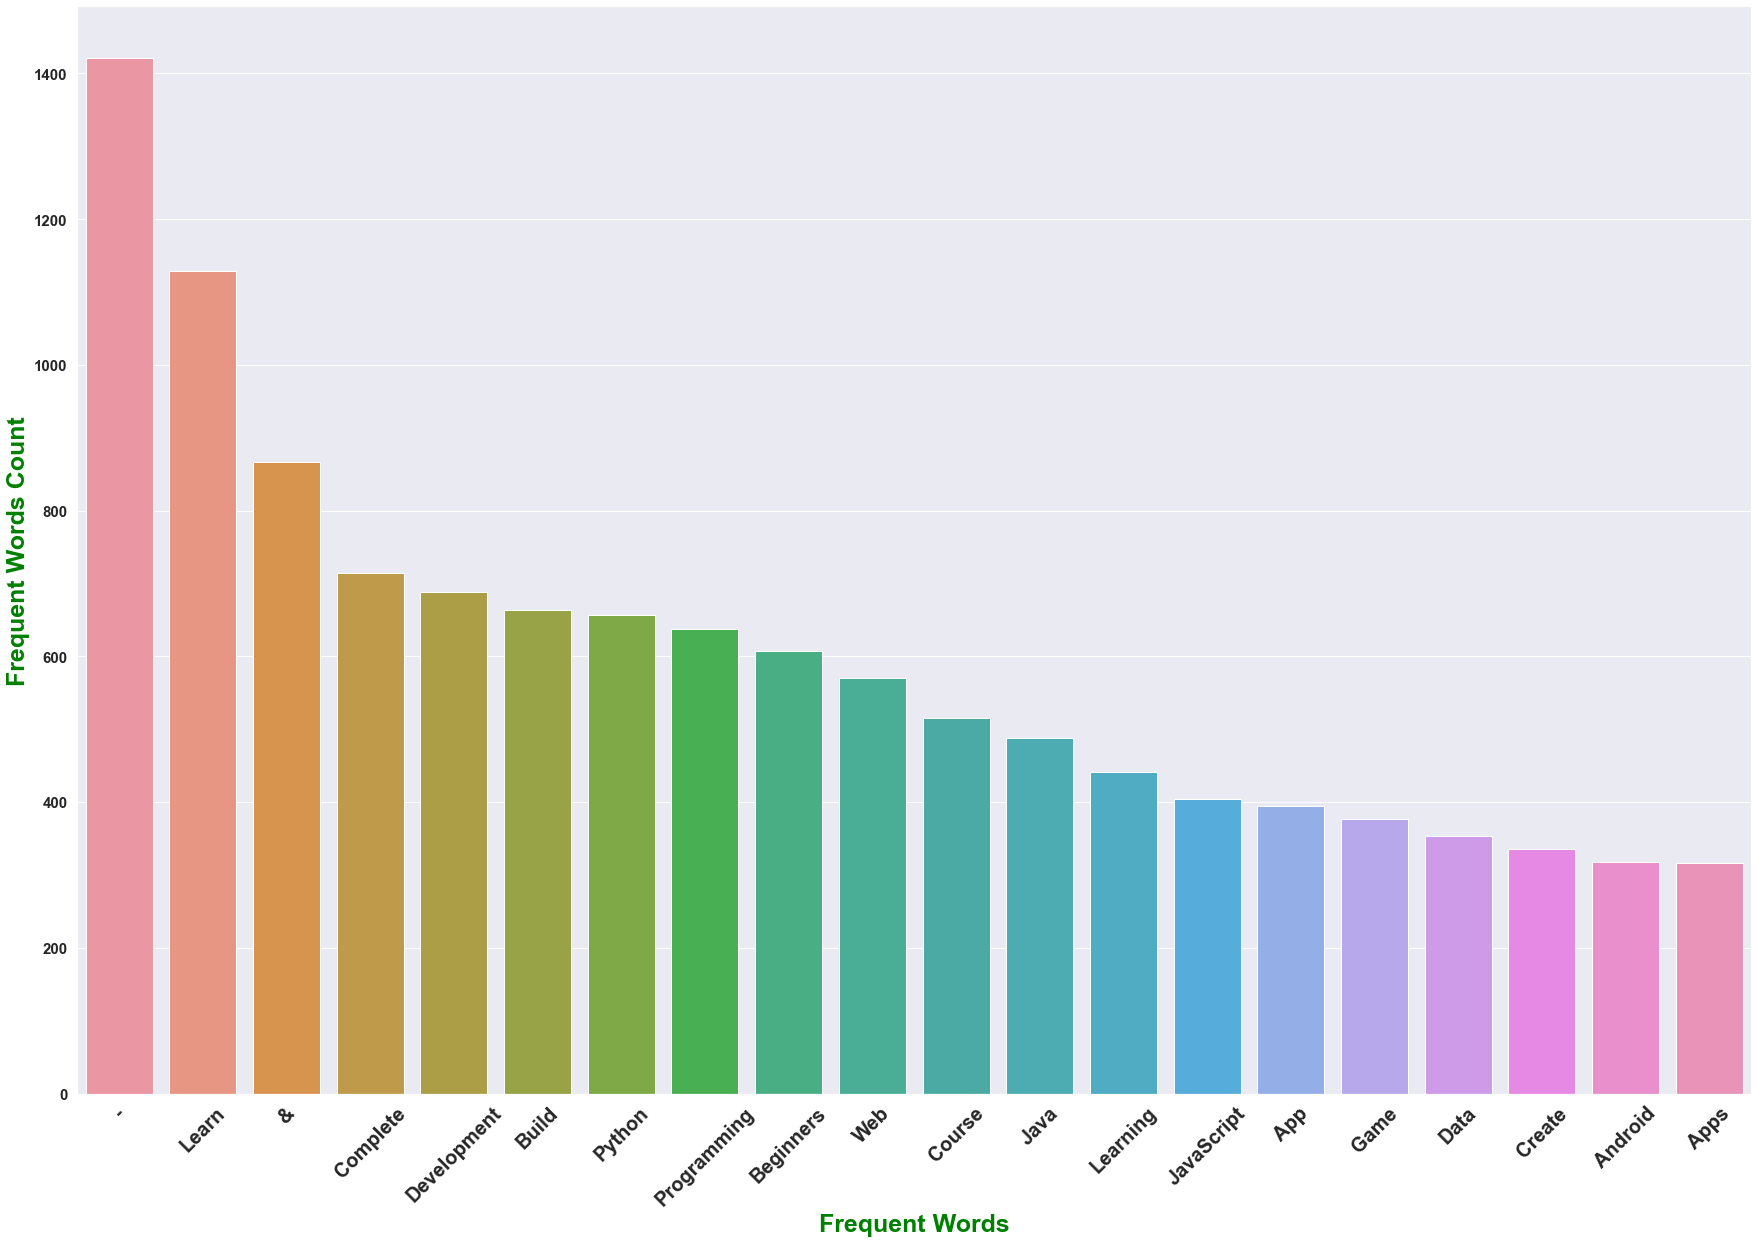

In [74]:
#visualize the most words
# Convert the dictionary to a DataFrame 
df = pd.DataFrame(freq_words.items(), columns=['Frequent Words', 'Count'])

# Set the Seaborn theme 
sns.set_theme()

# Create a bar plot
plt.figure(figsize=(30, 20))
sns.barplot(data=df, x='Frequent Words', y='Count')

# Customize plot
plt.xticks(rotation=45, fontsize=20, fontweight='bold')
plt.yticks(fontsize=15, fontweight='bold')
plt.xlabel('Frequent Words', fontsize=25, fontweight='bold', color='green')
plt.ylabel('Frequent Words Count', fontsize=25, fontweight='bold', color='green')

# Display the plot
plt.show()

### TOKENIZATION

In [34]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\abdul\AppData\Roaming\nltk_data...


True

In [88]:
rake = Rake()
allwords = ''.join(alltokens)

rake.extract_keywords_from_text(allwords)
rake.get_ranked_phrases_with_scores()

In [93]:
# vectorizing the course_title - collaborative filtering mechanism

countvect = CountVectorizer()

cv_mat = countvect.fit_transform(df_course['cleaned_title'])

cv_mat.todense()

<9243x4226 sparse matrix of type '<class 'numpy.int64'>'
	with 47206 stored elements in Compressed Sparse Row format>

#### There are foreign words in my dataset, gotta take note

In [95]:
df_cv_words = pd.DataFrame(cv_mat.todense(),columns=countvect.get_feature_names())

df_cv_words

,00,000,04,061,071,072,10,100,1000,101,...,zombies,zookeeper,zurb,zynq,الأول,الجزء,الصناعي,توجاف,لمحترف,مبتدئ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9240,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9241,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# cosine similarity matrix

cosine_sim_mat = cosine_similarity(cv_mat)

cosine_sim_mat

array([[1.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.20412415, 0.        ,
        0.28867513],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23570226, 0.20412415, 0.        , ..., 1.        , 0.23570226,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.23570226, 1.        ,
        0.33333333],
       [0.        , 0.28867513, 0.        , ..., 0.23570226, 0.33333333,
        1.        ]])

In [97]:
course_index_list = pd.Series(df_course.index,index = df_course['course_name']).drop_duplicates()

In [101]:
type(course_index_list)

pandas.core.series.Series

In [106]:
# a list to store the filtered course index numbers and 
# utilizes a dictionary to associate course keys with their names.
# course_name_dict = dict(course_index_list)
keyword = 'c++'
filtered_courses = []

for course_key in course_name_dict:
    if keyword in course_key:
        filtered_courses.append(course_key)

print(filtered_courses)

['Data Structures and Algorithms using c++']


In [111]:
df_course.head(1)

,course_id,course_name,subs,num_reviews,num_lectures,duration,last_update,publish_date,created_date,original_price,discount_price,level,label,cleaned_title
0,8082,Ruby Programming for Beginners,28445,643,56,6.0,2019-08-21,2011-08-07 21:32:00,2011-06-14 16:09:00,1050000,182000.0,All Levels,Ruby,Ruby Programming Beginners


In [113]:
'''This code recommends courses using cosine similarity
'''
def recommend_course(title, numrec=10):
    course_index = pd.Series(df_course.index, index=df_course['cleaned_title']).drop_duplicates()
    index = course_index[title]

    scores = cosine_sim_mat[index]
    sorted_indices = np.argsort(scores)[::-1]  # Sort in descending order

    selected_course_indices = sorted_indices[1:numrec + 1]  # Exclude the selected course

    rec_df = df_course.iloc[selected_course_indices]
    rec_df['Similarity_Score'] = scores[selected_course_indices]

    final_recommended_courses = rec_df[[
        'cleaned_title', 'Similarity_Score', 'level', 'duration', 'subs']]

    return final_recommended_courses

# Call the function with the desired course title and number of recommendations
recommended_courses = recommend_course('Javascript Beginners', numrec=10)
recommended_courses


C:\Users\abdul\AppData\Local\Temp/ipykernel_10848/3854321429.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rec_df['Similarity_Score'] = scores[selected_course_indices]


,cleaned_title,Similarity_Score,level,duration,subs
3,Javascript Beginners,1.000000,All Levels,3.00,3840
2227,JavaScript Beginners,1.000000,Beginner,3.50,91
2245,JavaScript programming: JavaScript beginners,0.866025,Beginner,5.00,2621
5925,JavaScript Projects JavaScript Beginners,0.866025,Beginner,7.50,3258
6690,JavaScript Basics Beginners,0.816497,Beginner,6.50,8034
4391,JavaScript beginners Students,0.816497,Beginner,1.50,12054
7303,GraphQL beginners JavaScript,0.816497,Beginner,5.50,1113
6302,JavaScript beginners - learn,0.816497,All Levels,3.50,2992
2824,Javascript :basics beginners,0.816497,Beginner,0.62,1058
6326,Javascript Beginners Course,0.816497,Beginner,1.50,3725


In [ ]:
#why use cosine or linear similarity?